# Занятие 3.
## HTTP requests, API

В этот раз мы поговорим о том, что можно сделать в интернете. Внезапно окажется, что всего несколько строчек кода - и нам доступен буквально весь интернет.

Протокол HTTP предназначен для передачи данных. Именно он используется браузером, если нужно посмотреть мемы, видосики и все такое. Мы же можем его использовать чтобы получить или отправить какие-то данные с сервера или на него.

Обмен сообщениями между сервером и клиентом проиходит по принципу "запрос-ответ". Клиент совершает некий запрос и получает на него ответ сервера.

### Структура HTTP запроса:

* Строка запроса – указывает метод передачи, URL-адрес, к которому нужно обратиться и версию протокола HTTP.
* Заголовки – описывают тело сообщений, передают различные параметры и др. сведения и информацию.
* Тут пустая строка в качестве разделителя.
* Тело сообщения — это сами данные, которые передаются в запросе. Тело сообщения – необязательный параметр, который может, строго говоря, и отсутствовать в нашем запросе.

Например, если мы хотим получить статью википеди про http, то наш браузер сделает следующий запрос:

```
GET /wiki/HTTP HTTP/1.1
Host: ru.wikipedia.org
User-Agent: Mozilla/5.0 (X11; U; Linux i686; ru; rv:1.9b5) Gecko/2008050509 Firefox/3.0b5
Accept: text/html
Connection: close
(пустая строка)  
```

Первые 2 строки это строка запроса, все оставшиеся - заголовки. В этом запросе отсутствует тело. Ответ на этот запрос будет следующий:

```
HTTP/1.1 200 OK
Date: Wed, 11 Feb 2009 11:20:59 GMT
Server: Apache
X-Powered-By: PHP/5.2.4-2ubuntu5wm1
Last-Modified: Wed, 11 Feb 2009 11:20:59 GMT
Content-Language: ru
Content-Type: text/html; charset=utf-8
Content-Length: 1234
Connection: close
(пустая строка)
(запрошенная страница в HTML)
```

## TL; DR

HTTP - это такое соглашение о том, в каком формате слать данные, если мы работаем в сети и шлем (чаще всего) сайты. Его интересует URL, вид запроса, и его тело(иногда). Все остальное обычно является служебной информацией и вас мало волнует.  

---


### Виды HTTP-запросов

Вообще, есть много разных видов HTTP-запросов, порядка 10. В реальности почти всегда используют два самых популярных: `GET` и `POST`

* `GET` передает набор параметров к данному url. Обычно используется для почти всего, кроме тех случаев, когда параметр очень большой или нам нужна какая-то сохранность данных
* `POST` отправляет еще и тело запроса. Обычно это какой-то файлик с данными, который серверу надо прочитать, чтобы понять, что от нас хочет клиент. Этот файлик не так просто подменить, как URL (__samplebanksite.com/send-all-your-money?from=you&to=me__)-, поэтому все чувствительные данные надо передавать именно им.

## GET-запросы

Для работы в вебе в питоне уже есть модуль requests, который выполняет все, что нам нужно

In [2]:
import requests

In [3]:
result = requests.get('http://www.neverssl.com/')

In [4]:
# 200 is OK
result.status_code

200

In [5]:
# now let's get our response
result.text

'<html>\n    <head>\n        <title>NeverSSL - helping you get online</title>\n\n        <style>\n        body {\n             font-family: Montserrat, helvetica, arial, sans-serif; \n             font-size: 16x;\n             color: #444444;\n             margin: 0;\n        }\n        h2 {\n            font-weight: 700;\n            font-size: 1.6em;\n            margin-top: 30px;\n        }\n        p {\n            line-height: 1.6em;\n        }\n        .container {\n            max-width: 650px;\n            margin: 20px auto 20px auto;\n            padding-left: 15px;\n            padding-right: 15px\n        }\n        .header {\n            background-color: #42C0FD;\n            color: #FFFFFF;\n            padding: 10px 0 10px 0;\n            font-size: 2.2em;\n        }\n        <!-- CSS from Mark Webster https://gist.github.com/markcwebster/9bdf30655cdd5279bad13993ac87c85d -->\n        </style>\n    </head>\n    <body>\n\n    <div class="header">\n        <div class="conta

## Beautiful soup


Для того, чтобы адекватно парсить html-странички, есть специальная питон-библиотека Beautiful soup. Она принимает текст html-странички, а в ответ умеет находить теги

In [6]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(result.text)
# print(soup.prettify()) # better structure than last print, but more text space required. try it yourself

Я поиграл со страничкой, за счет чего смог выделить основное тело сайта. Оно выглядит так:

* Тег \<body\>
* Вложенный набор тегов \<div\>
* В одном из тегов \<div\> лежит заголовок h2

Вот так я достал то, что хотел:

In [7]:
body = soup.body
divs = body.find_all('div')
what = divs[3]
header = what.h2
header

<h2>What?</h2>

## API

API - это такой вид сайтов в интернете, которые предоставляют тебе набор **ручек**, которые решают какую-то свою задачу для пользователя. Зачастую API бесплатны для личного пользования и платны, если ваша нагрузка на сервис достаточно высока.

Прелесть API в том, что вся сложная логика для вас спрятана, пользоваться надо только URL и параметрами.

Работа с API происходит через какие-то HTTP-запросы, которые кто-то написал на отдельной страничке. Для примера я нашел: https://deckofcardsapi.com/

А возвращаются данные каким-то удобным образом: чаще всего это JSON

In [1]:
import json

In [2]:
result = json.loads(requests.get('https://deckofcardsapi.com/api/deck/new/?deck_count=1').text)

NameError: name 'requests' is not defined

In [12]:
result['deck_id']

'g13h0ewn7npd'

Теперь давайте вытянем шесть карт с помощью этой колоды

In [13]:
url = 'https://deckofcardsapi.com/api/deck/' + result['deck_id'] + '/draw/?count=1'
for i in range(6):
    card = json.loads(requests.get(url).text)['cards'][0]
    print(card['value'], card['suit'])

ACE SPADES
2 SPADES
3 SPADES
4 SPADES
5 SPADES
6 SPADES


Можно заметить, что колода идет по возрастанию, нам такая колода не нужна. А кроме этого мы сделали целых 7 запросов (и нам бы понадобился еще один на перемешивание колоды). Если правильно использовать API, то можно то же самое сделать одним http-запросом

In [15]:
url = 'https://deckofcardsapi.com/api/deck/new/draw/?count=6'
cards = json.loads(requests.get(url).text)['cards']
for i in range(6):
    card = cards[i]
    print(card['value'], card['suit'])

8 CLUBS
ACE SPADES
9 SPADES
10 SPADES
KING SPADES
7 HEARTS


Вы скажете -- ну и зачем мне это API, если я сам бы мог написать перемешивание колоды карт, а не делать какие-то запросы к неизвестному сервису?

А я отвечу -- вы могли бы, но на разработку потратилось бы в десять раз больше времени, а результат не окупился бы. Таковы правила разработки -- реализовывать следует то, что выгодно реализовывать самому, а все остальное следует сначала поискать в интернете.

## POST-запросы

Я не смог найти **ЛУЧШИЙ** пример, который мы смогли бы использовать для POST-реквестов в своих фановых целях, но нашел достаточно хороший. В общем, этот сайт рисует графики. Круто? Круто! мы ему отдаем JSON с данными, а он их съедает и выплевывает картинку.

Если порыться на их сайте, то можно узнать, что то же самое их API поддерживает и через GET-запросы. Но в этой ситуации POST куда удобнее - через него мы передаем наши чувствительные данные отдельным файлом.

Иначе говоря, если мы будем рисовать текущую прибыль компании (приватные данные), то злоумышленнику понадобится доступ к источнику наших данных, что очень сложно обеспечить. Перехватить их по пути (при использовании защищенного соединения) не получится.

In [16]:
from math import exp
quickchart_url = 'https://quickchart.io/chart/create'

labels = ['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020']
data = [exp(6), exp(7), exp(8), exp(9), exp(10)]

post_data = {'chart': {'type': 'line', 'data': {'labels': labels,
             'datasets': [{'label': 'Time spended looking at exponential graphs', 'data': data}]}}}

response = requests.post(
    quickchart_url,
    json=post_data,
)

if (response.status_code == 200):
    chart_response = json.loads(response.text)
    print(chart_response)

{'success': True, 'url': 'https://quickchart.io/chart/render/zf-773bfd05-a7ac-46ae-8f2f-6d5566a3657a'}


Вот так вот мы отправили какие-то сложные данные. Нам в ответ отправили не картинку, а ссылку на статичную картинку. Теперь надо ее загрузить:

In [17]:
# https://stackoverflow.com/a/13137873
import shutil

r = requests.get(chart_response['url'], stream=True)
if r.status_code == 200:
    with open('saved_chart.png', 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f)  

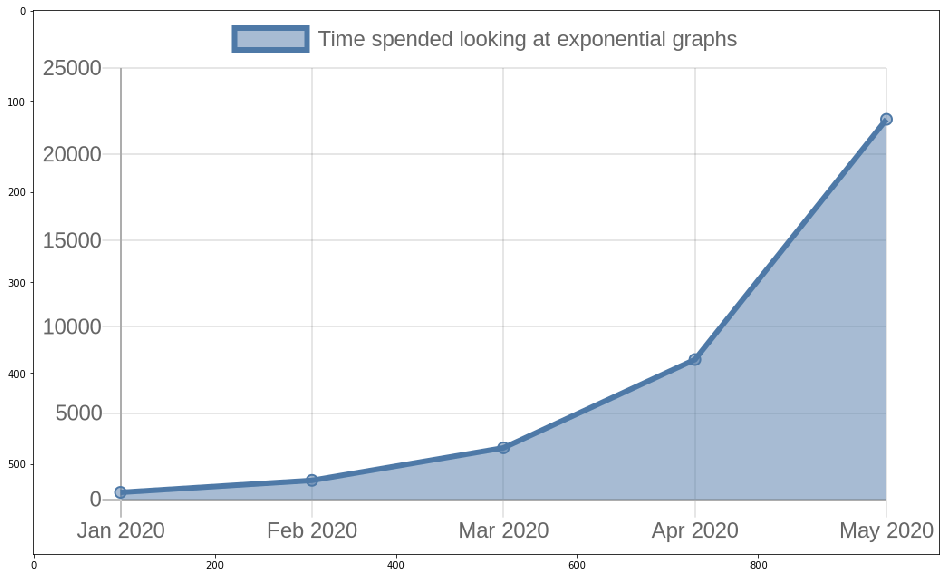

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

img = mpimg.imread('saved_chart.png')
plt.figure(figsize = (100, 10))
plt.imshow(img, interpolation='nearest')

## Token api

Давайте теперь попробуем другое апи: API musixmatch. Это такие ребята, которые выдают тебе песни и их тексты.

Для начала придется зарегистрироваться на их сайте: 
https://developer.musixmatch.com/documentation/api-reference/track-get. После этого вы получите специальную случайную строку - токен, который будет вашим уникальным аналогом пароля.

Я категорически запрещаю вам хранить токен в исходном коде. Это потом практически невозможно стереть из интернета, а пользоваться им смогут все. Хорошая стратегия такая: вы создаете файл config.json, в котором лежит заглушка для токена, а на сервере файл меняется и туда записывается настоящий код 

In [47]:
# json_config = {'token': 'TOKEN_PLACEHOLDER'}
# json.dump(json_config, open('config.json', 'w'))

In [48]:
TOKEN = json.load(open('config.json', 'r'))['token']

In [49]:
url = 'https://api.musixmatch.com/ws/1.1/chart.tracks.get?chart_name=top&counry=ru&apikey=' + TOKEN
tracks = json.loads(requests.get(url).text)

In [50]:
track = tracks['message']['body']['track_list'][0]['track']
{(x, track[x]) for x in ['track_name', 'artist_name', 'album_name']}

{('album_name', 'Bad Habits - Single'),
 ('artist_name', 'Ed Sheeran'),
 ('track_name', 'Bad Habits')}

С помощью track.search можно найти id вашего любимого трека
Я вот нашел 

`"track_id":198417175`

Давайте прочитаем текст трека!

In [51]:
url = 'https://api.musixmatch.com/ws/1.1/track.lyrics.get?track_id=198417175&counry=ru&apikey=' + TOKEN
track = json.loads(requests.get(url).text)

In [55]:
track['message']['body']['lyrics']['lyrics_body'].split('\n')[0]

'Слава, что ты сделал?'

Сразу становится понятно, что дальше показывать я не буду :))

## Домашнее задание

Надо сделать какой-то проект, который будет использовать интересное API из интернета, которое вы сможете найти.

В любом случае, ваша задача: найти либо апи, либо сайт вам по душе, после чего сделать что-то на его основе.

Почти гарантированно у вас получится параметризованный скрипт, который после запуска идет делать запросы к интересному апи и вытягивает оттуда информацию. Скорее всего, кода получится мало, так что рекомендую потратить время на то, чтобы найти api себе по душе.

Вот еще списочек того, что можно сделать.

* Lichess bot - Чтобы играть в шахматы или решать какие-то задачки (например, перебором научить его ставить мат в два хода). https://lichess.org/api#section/Introduction
* Апи для гифок, можно сделать скрипт, который по запросу находит гифку https://developers.giphy.com/docs/api/schema/#gif-object
* Можно брать случайную цитату из аниме и подписывать ей аватарку https://github.com/RocktimSaikia/anime-chan
* Апи Вконтакте. Можно, как вариант, сделать постоянно обновляющийся статус (я видел "уже %time, а ты еще не спишь") - https://vk.com/dev/methods
* Очень хорошая подборка по разным темам, полистайте и найдите себе по душе https://github.com/public-apis/public-apis
* Еще для вдохновения https://learn.vonage.com/blog/2021/03/15/the-ultimate-list-of-fun-apis-for-your-next-coding-project/